### Segment the customers

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
TXN=pd.read_csv("ds_challenge_apr2021.csv")

In [4]:
TXN.head(2)

,ID_USER,genero,monto,fecha,hora,dispositivo,establecimiento,ciudad,tipo_tc,linea_tc,interes_tc,status_txn,is_prime,dcto,cashback,fraude
0,0,F,608.345634,2020-01-21,20,"{'model': 2020, 'device_score': 3, 'os': 'ANDR...",Super,Merida,Física,71000,51,Aceptada,False,60.834563,5.475111,False
1,0,F,88.719243,2020-01-15,7,"{'model': 2020, 'device_score': 1, 'os': 'ANDR...",NaN,Merida,Virtual,71000,51,Aceptada,False,0.000000,1.774385,False


In [12]:
TXN["TXN"]=1

In [41]:
Approved_TXN=pd.DataFrame(TXN[TXN["status_txn"]=="Aceptada"].groupby("ID_USER")[["TXN","monto","dcto","cashback"]].sum()).reset_index()
Declined_TXN=pd.DataFrame(TXN[TXN["status_txn"]=="Rechazada"].groupby("ID_USER")[["TXN","monto","dcto","cashback"]].sum()).reset_index()
In_Process_TXN=pd.DataFrame(TXN[TXN["status_txn"]=="En proceso"].groupby("ID_USER")[["TXN","monto","dcto","cashback"]].sum()).reset_index()
Fraudulent_TXN=pd.DataFrame(TXN[TXN["fraude"]==True].groupby("ID_USER")[["TXN"]].sum()).reset_index()

In [26]:
Approved_TXN.columns

Index(['ID_USER', 'TXN', 'monto', 'dcto', 'cashback'], dtype='object')

In [42]:
Approved_TXN.columns=["ID_USER","TXN_Aprobadas","Monto_Aprobadas","dcto_Aprobadas",
                      "cashback_Aprobadas"]
Declined_TXN.columns=["ID_USER","TXN_Declinadas","Monto_Declinadas","dcto_Declinadas",
                      "cashback_Declinadas"]
In_Process_TXN.columns=["ID_USER","TXN_En_Proceso","Monto_En_Proceso","dcto_En_Proceso",
                      "cashback_En_Proceso"]
Fraudulent_TXN.columns=["ID_USER","TXN_Fraudulentas"]

In [43]:
Customers=Approved_TXN.merge(Declined_TXN,on="ID_USER",how="outer")

In [44]:
Customers=Customers.merge(In_Process_TXN,on="ID_USER",how="outer")

In [45]:
Customers=Customers.merge(Fraudulent_TXN,on="ID_USER",how="outer")

In [46]:
Customers

,ID_USER,TXN_Aprobadas,Monto_Aprobadas,dcto_Aprobadas,cashback_Aprobadas,TXN_Declinadas,Monto_Declinadas,dcto_Declinadas,cashback_Declinadas,TXN_En_Proceso,Monto_En_Proceso,dcto_En_Proceso,cashback_En_Proceso,TXN_Fraudulentas
0,0,2.0,697.064876,60.834563,7.249496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5.0,2589.754665,124.631382,32.857413,1.0,37.003747,0.0,0.370037,1.0,790.037653,0.000000,15.800753,NaN
2,2,6.0,2352.943151,187.566527,21.653766,NaN,NaN,NaN,NaN,1.0,436.950266,87.390053,6.991204,NaN
3,3,2.0,477.972148,0.000000,4.779721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.0,277.176524,55.435305,2.217412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1889.223054,283.331486,16.058916,2.0
3996,3806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,63.560282,0.000000,0.635603,NaN
3997,3808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,821.479011,82.147901,14.786622,NaN
3998,3886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,573.492006,0.000000,5.734920,NaN


#### Replace NaN with 0's

In [48]:
Customers=Customers.fillna(0)

In [59]:
TXN["ciudad"]=TXN["ciudad"].fillna("Desconocido")
TXN["establecimiento"]=TXN["establecimiento"].fillna("Desconocido")

In [ ]:
## In what city, establishment the customer transacts?

In [69]:
Location_TXN=pd.DataFrame(TXN.groupby("ID_USER")["ciudad"].value_counts())

In [72]:
Location_TXN.columns=["City"]

In [78]:
Location_TXN=Location_TXN.reset_index()

In [91]:
Establishment_TXN=pd.DataFrame(TXN.groupby("ID_USER")["establecimiento"].apply(lambda x: pd.value_counts(x).index[0])).reset_index()

In [94]:
Type_card_TXN=pd.DataFrame(TXN.groupby("ID_USER")["tipo_tc"].apply(lambda x: pd.value_counts(x).index[0])).reset_index()

### Add categorical variables to Customer dataset

In [99]:
Customers=Customers.merge(Location_TXN,on="ID_USER",how="left")

In [100]:
Customers=Customers.merge(Establishment_TXN,on="ID_USER",how="left")

In [101]:
Customers=Customers.merge(Type_card_TXN,on="ID_USER",how="left")

In [102]:
Customers

,ID_USER,TXN_Aprobadas,Monto_Aprobadas,dcto_Aprobadas,cashback_Aprobadas,TXN_Declinadas,Monto_Declinadas,dcto_Declinadas,cashback_Declinadas,TXN_En_Proceso,Monto_En_Proceso,dcto_En_Proceso,cashback_En_Proceso,TXN_Fraudulentas,ciudad,City,establecimiento,tipo_tc
0,0,2.0,697.064876,60.834563,7.249496,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Merida,2,Desconocido,Física
1,1,5.0,2589.754665,124.631382,32.857413,1.0,37.003747,0.0,0.370037,1.0,790.037653,0.000000,15.800753,0.0,Guadalajara,7,Desconocido,Física
2,2,6.0,2352.943151,187.566527,21.653766,0.0,0.000000,0.0,0.000000,1.0,436.950266,87.390053,6.991204,0.0,Toluca,7,Desconocido,Física
3,3,2.0,477.972148,0.000000,4.779721,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Toluca,2,Super,Física
4,4,1.0,277.176524,55.435305,2.217412,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,Merida,1,Restaurante,Física
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3756,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,2.0,1889.223054,283.331486,16.058916,2.0,Monterrey,2,Desconocido,Física
3996,3806,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,63.560282,0.000000,0.635603,0.0,Desconocido,1,Super,Física
3997,3808,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,821.479011,82.147901,14.786622,0.0,Desconocido,1,Desconocido,Virtual
3998,3886,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1.0,573.492006,0.000000,5.734920,0.0,Desconocido,1,Desconocido,Física


### OHE in Categorical variables

In [103]:
from sklearn.preprocessing import OneHotEncoder

In [104]:
enc = OneHotEncoder(handle_unknown='ignore')

In [106]:
Categorical_Data=Customers[['ciudad','establecimiento','tipo_tc']]

In [113]:
Categorical_Data=pd.DataFrame.sparse.from_spmatrix(enc.fit_transform(Categorical_Data))

In [115]:
Categorical_Data.columns=enc.get_feature_names_out(['ciudad','establecimiento','tipo_tc'])

In [122]:
Customers=pd.concat([Customers,Categorical_Data],axis=1)

In [123]:
Customers.columns

Index(['ID_USER', 'TXN_Aprobadas', 'Monto_Aprobadas', 'dcto_Aprobadas',
       'cashback_Aprobadas', 'TXN_Declinadas', 'Monto_Declinadas',
       'dcto_Declinadas', 'cashback_Declinadas', 'TXN_En_Proceso',
       'Monto_En_Proceso', 'dcto_En_Proceso', 'cashback_En_Proceso',
       'TXN_Fraudulentas', 'ciudad', 'City', 'establecimiento', 'tipo_tc',
       'ciudad_Desconocido', 'ciudad_Guadalajara', 'ciudad_Merida',
       'ciudad_Monterrey', 'ciudad_Toluca', 'establecimiento_Abarrotes',
       'establecimiento_Desconocido', 'establecimiento_Farmacia',
       'establecimiento_MPago', 'establecimiento_Restaurante',
       'establecimiento_Super', 'tipo_tc_Física', 'tipo_tc_Virtual'],
      dtype='object')

### Clustering

In [137]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [194]:
Customers_Cluster=Customers[Customers["TXN_Fraudulentas"]==0]

In [195]:
X=Customers_Cluster[["TXN_Aprobadas","TXN_Declinadas","TXN_En_Proceso", 'ciudad_Guadalajara', 'ciudad_Merida',
       'ciudad_Monterrey', 'ciudad_Toluca', 'establecimiento_Abarrotes',
       'establecimiento_Desconocido', 'establecimiento_Farmacia',
       'establecimiento_MPago', 'establecimiento_Restaurante',
       'establecimiento_Super', 'tipo_tc_Física', 'tipo_tc_Virtual']]

In [196]:
scaler = StandardScaler()

In [197]:
X=scaler.fit_transform(X)

/home/salvador/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/home/salvador/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:617: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


### Elbow method

In [198]:
Inertias=list()
Distortiosn=list()

In [199]:
for n_cluster in range(2,10):
    kmeanModel = KMeans(n_clusters=n_cluster).fit(X)
    Inertias.append(kmeanModel.inertia_)
    Distortiosn.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    print(n_cluster)

2
3
4
5
6
7
8
9


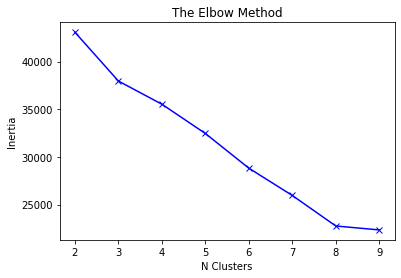

In [200]:
plt.plot(range(2,10), Inertias, 'bx-')
plt.xlabel('N Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

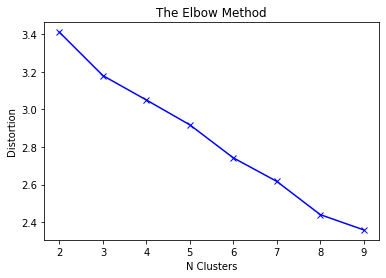

In [201]:
plt.plot(range(2,10), Distortiosn, 'bx-')
plt.xlabel('N Clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [202]:
kmeanModel = KMeans(n_clusters=3).fit(X)

In [203]:
Clusters=kmeanModel.predict(X)

In [204]:
pd.Series(Clusters).value_counts()

2    1750
0    1151
1     424
dtype: int64

In [205]:
Customers_Cluster["Cluster"]=Clusters

/home/salvador/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [211]:
Customers=Customers.merge(Customers_Cluster[["ID_USER","Cluster"]],
                         on="ID_USER",how="left")

In [215]:
Customers["Cluster"].isna().sum()

675

In [219]:
Customers.groupby("Cluster")[['TXN_Aprobadas', 'Monto_Aprobadas', 'TXN_Declinadas', 'Monto_Declinadas', 'TXN_En_Proceso',
       'Monto_En_Proceso',
       'TXN_Fraudulentas','tipo_tc_Física', 'tipo_tc_Virtual',
                              'establecimiento_Abarrotes',
       'establecimiento_Desconocido', 'establecimiento_Farmacia',
       'establecimiento_MPago', 'establecimiento_Restaurante',
       'establecimiento_Super',]].mean()

/home/salvador/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/sparse/array.py:1285: RuntimeWarning: invalid value encountered in double_scalars
  return (sp_sum + self.fill_value * nsparse) / (ct + nsparse)


,TXN_Aprobadas,Monto_Aprobadas,TXN_Declinadas,Monto_Declinadas,TXN_En_Proceso,Monto_En_Proceso,TXN_Fraudulentas,tipo_tc_Física,tipo_tc_Virtual,establecimiento_Abarrotes,establecimiento_Desconocido,establecimiento_Farmacia,establecimiento_MPago,establecimiento_Restaurante,establecimiento_Super
Cluster,,,,,,,,,,,,,,,
0.0,3.008688,1501.645892,0.457863,222.793497,0.844483,419.264013,0.0,1.0,0.0,0.185925,0.000000,0.121633,0.220678,0.296264,0.175500
1.0,2.596698,1271.765015,0.384434,199.052739,0.839623,406.813262,0.0,0.0,1.0,0.080189,0.504717,0.087264,0.106132,0.129717,0.091981
2.0,5.016000,2526.883319,0.733143,364.102797,1.451429,718.192566,0.0,1.0,0.0,0.000000,0.999429,0.000571,0.000000,0.000000,0.000000


## Define the Clusters:
Cluster 2: Heavy Users

Cluster 1: Medium Digital Users

Cluster 0: Medium Users

Cluster NaN: Fraudsters Users


In [220]:
Customers["Cluster"]=np.where(Customers["Cluster"].isna(),"Fraudster User",
                             np.where(Customers["Cluster"]==2,"Heavy User",
                                     np.where(Customers["Cluster"]==1,"Medium Digital User"
                                              ,"Medium User")))

In [222]:
Customers.groupby("Cluster")[['TXN_Aprobadas', 'Monto_Aprobadas', 'TXN_Declinadas', 'Monto_Declinadas', 'TXN_En_Proceso',
       'Monto_En_Proceso',
       'TXN_Fraudulentas','tipo_tc_Física', 'tipo_tc_Virtual',
                              'establecimiento_Abarrotes',
       'establecimiento_Desconocido', 'establecimiento_Farmacia',
       'establecimiento_MPago', 'establecimiento_Restaurante',
       'establecimiento_Super',]].mean()

/home/salvador/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/sparse/array.py:1285: RuntimeWarning: invalid value encountered in double_scalars
  return (sp_sum + self.fill_value * nsparse) / (ct + nsparse)


,TXN_Aprobadas,Monto_Aprobadas,TXN_Declinadas,Monto_Declinadas,TXN_En_Proceso,Monto_En_Proceso,TXN_Fraudulentas,tipo_tc_Física,tipo_tc_Virtual,establecimiento_Abarrotes,establecimiento_Desconocido,establecimiento_Farmacia,establecimiento_MPago,establecimiento_Restaurante,establecimiento_Super
Cluster,,,,,,,,,,,,,,,
Fraudster User,8.151111,4039.929072,1.210370,624.980663,2.182222,1087.414267,1.2,0.921481,0.078519,0.050370,0.714074,0.019259,0.063704,0.087407,0.065185
Heavy User,5.016000,2526.883319,0.733143,364.102797,1.451429,718.192566,0.0,1.000000,0.000000,0.000000,0.999429,0.000571,0.000000,0.000000,0.000000
Medium Digital User,2.596698,1271.765015,0.384434,199.052739,0.839623,406.813262,0.0,0.000000,1.000000,0.080189,0.504717,0.087264,0.106132,0.129717,0.091981
Medium User,3.008688,1501.645892,0.457863,222.793497,0.844483,419.264013,0.0,1.000000,0.000000,0.185925,0.000000,0.121633,0.220678,0.296264,0.175500


In [223]:
Customers["Is_Fraudster"]=np.where(Customers["Cluster"]=="Fraudster User",1,0)

In [224]:
Customers.groupby("Is_Fraudster")[['TXN_Aprobadas', 'Monto_Aprobadas', 'TXN_Declinadas', 'Monto_Declinadas', 'TXN_En_Proceso',
       'Monto_En_Proceso',
       'TXN_Fraudulentas','tipo_tc_Física', 'tipo_tc_Virtual',
                              'establecimiento_Abarrotes',
       'establecimiento_Desconocido', 'establecimiento_Farmacia',
       'establecimiento_MPago', 'establecimiento_Restaurante',
       'establecimiento_Super',]].mean()

/home/salvador/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/sparse/array.py:1285: RuntimeWarning: invalid value encountered in double_scalars
  return (sp_sum + self.fill_value * nsparse) / (ct + nsparse)


,TXN_Aprobadas,Monto_Aprobadas,TXN_Declinadas,Monto_Declinadas,TXN_En_Proceso,Monto_En_Proceso,TXN_Fraudulentas,tipo_tc_Física,tipo_tc_Virtual,establecimiento_Abarrotes,establecimiento_Desconocido,establecimiento_Farmacia,establecimiento_MPago,establecimiento_Restaurante,establecimiento_Super
Is_Fraudster,,,,,,,,,,,,,,,
0,4.012632,2011.930405,0.593383,294.139420,1.163308,575.007126,0.0,0.872481,0.127519,0.074586,0.590376,0.053534,0.089925,0.119098,0.072481
1,8.151111,4039.929072,1.210370,624.980663,2.182222,1087.414267,1.2,0.921481,0.078519,0.050370,0.714074,0.019259,0.063704,0.087407,0.065185


### Describe the Clusters
1) Fraudster User: They Transact a lot with a large amount. 
In fact they:
1. +103% Approved and Declined TXN than the others
2. -1.73% Credit Line than the others
3. Universe: 675

2) Heavy User: 
1. +67% Approved TXN than Medium Users
2. +82% Amount of Approved TXN than Medium Users
3. All of them transact with physical Credit Card
4. Universe: 1,750

3) Medium User: 
1. -40% Approved TXN than Heavy Users
2. -40% Amount of Approved TXN than Heavy Users
3. All of them transact with physical Credit Card
4. Universe: 1,151

4) Medium Digital User:
1. -48% Approved TXN than Heavy Users
2. -49% Amount of Approved TXN than Heavy Users
3. All of them transact with Digital Credit Card
4. Universe: 424

